In [139]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [237]:
class Perceptron:
    def __init__(self, df):
        self.df = df
        self.n = df.shape[0]
        self.x = df.loc[:, df.columns!='y']
        self.d = len(self.x.columns)
        self.x.insert(0, 'x0', 1)
        self.y = df['y']
        self.W = np.array([1 for _ in range(self.d+1)])
        
    def display_attr(self):
        print(self.x)
        print(self.y)
        print(self.d)
        print(self.W)
        
    def build_model(self, plot=False):
        Wold = self.W
        n = self.n
        epochs = 0
        x = self.x
        y = self.y
        Wnew = None
        eta = 1
        
        print(f"The Learning Rate is {eta}")
        print(f"The initial Weights are {Wold}")
        
        while True:
            if epochs!=0:
                Wnew = Wold
            
            print(f"Running Epoch {epochs+1} ==", end='')
            for i in range(n):
                print("==", end='')
                x_vec = x.iloc[i]
                y_hat = 1 if Wold.T.dot(x_vec)>0 else 0
                y_true = y.iloc[i]
                
                if y_true==y_hat:
                    continue
                else:
                    Wu = Wold + (y_true-y_hat)*eta*np.array(x_vec)
                    Wold = Wu
                
            epochs += 1
            print("==>")
            print(f"Old Weights {Wold}")
            print(f"New Weights: {Wnew}")
            
            if plot:
                self.plot_graph(Wold)
            
            if (Wold==Wnew).all():
                break
        
        
        self.W = Wnew
        print(self.W)
    
    def plot_graph(self, W):
        w0, w1, w2 = W
        x = self.x
        y = self.y
        x1 = np.linspace(-2, 2, 100)
        x2 = (-w0-w1*x1)/w2
        
        
        plt.scatter(x['x1'], x['x2'])
        plt.plot(x1, x2, '-r')
        plt.legend(['Datapoints', 'Hyperplane - (wTx = 0)'])
        plt.show()

In [238]:
or_df = pd.DataFrame({'x1':[0, 0, 1, 1], 'x2':[0, 1, 0, 1], 'y':[0, 1, 1, 1]})
and_df = pd.DataFrame({'x1':[0, 0, 1, 1], 'x2':[0, 1, 0, 1], 'y':[0, 0, 0, 1]})

In [239]:
p1 = Perceptron(or_df)
p2 = Perceptron(and_df)

In [240]:
p1.build_model()

The Learning Rate is 1
The initial Weights are [1 1 1]
Running Epoch 1 ============>
Old Weights [0 1 1]
New Weights: None
Running Epoch 2 ============>
Old Weights [0 1 1]
New Weights: [0 1 1]
[0 1 1]


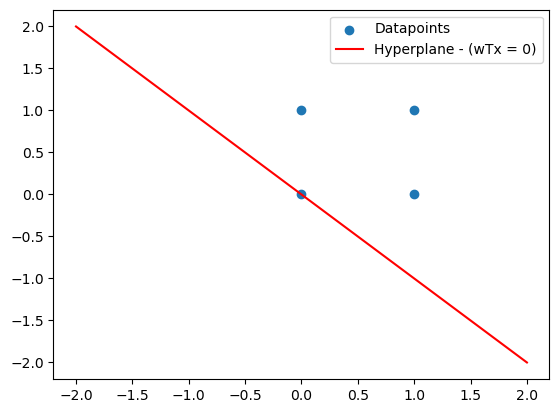

In [241]:
p1.plot_graph(p1.W)

In [242]:
p2.build_model()

The Learning Rate is 1
The initial Weights are [1 1 1]
Running Epoch 1 ============>
Old Weights [0 2 1]
New Weights: None
Running Epoch 2 ============>
Old Weights [-1  2  1]
New Weights: [0 2 1]
Running Epoch 3 ============>
Old Weights [-1  2  2]
New Weights: [-1  2  1]
Running Epoch 4 ============>
Old Weights [-2  2  1]
New Weights: [-1  2  2]
Running Epoch 5 ============>
Old Weights [-2  2  1]
New Weights: [-2  2  1]
[-2  2  1]


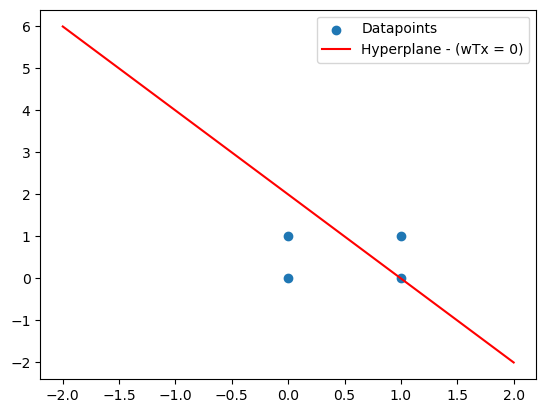

In [243]:
p2.plot_graph(p2.W)

The Learning Rate is 1
The initial Weights are [1 1 1]
Running Epoch 1 ============>
Old Weights [0 1 1]
New Weights: None


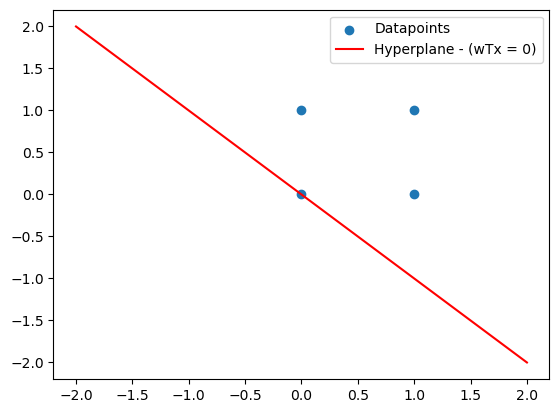

Running Epoch 2 ============>
Old Weights [0 1 1]
New Weights: [0 1 1]


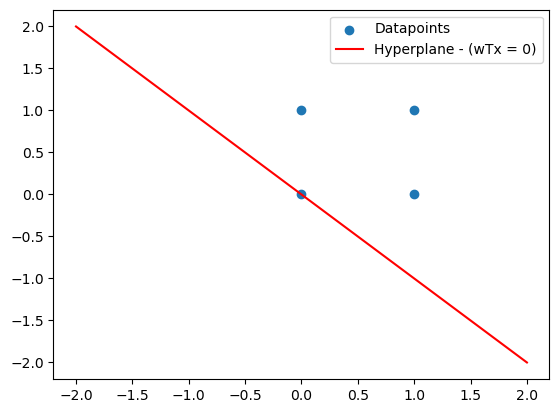

[0 1 1]


In [244]:
p3 = Perceptron(or_df)
p3.build_model(plot=True)

The Learning Rate is 1
The initial Weights are [1 1 1]
Running Epoch 1 ============>
Old Weights [0 2 1]
New Weights: None


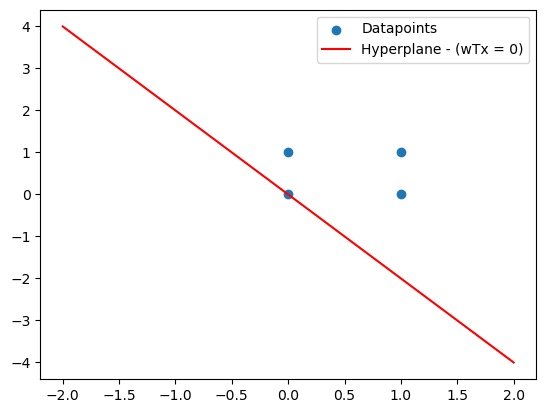

Running Epoch 2 ============>
Old Weights [-1  2  1]
New Weights: [0 2 1]


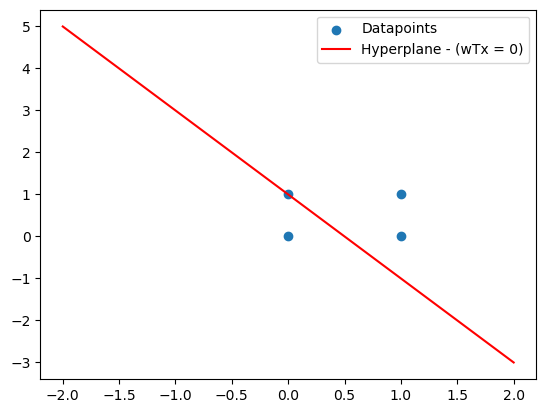

Running Epoch 3 ============>
Old Weights [-1  2  2]
New Weights: [-1  2  1]


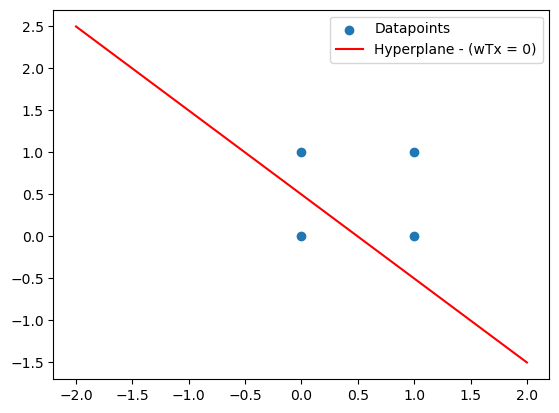

Running Epoch 4 ============>
Old Weights [-2  2  1]
New Weights: [-1  2  2]


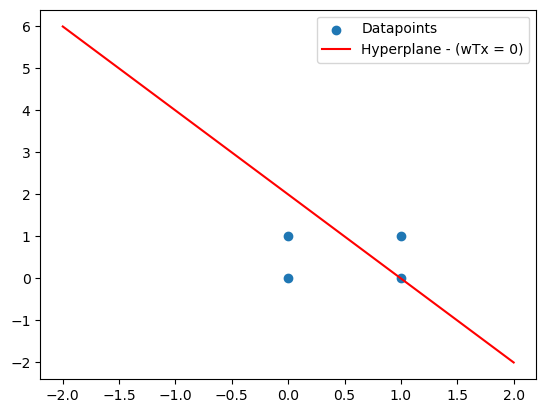

Running Epoch 5 ============>
Old Weights [-2  2  1]
New Weights: [-2  2  1]


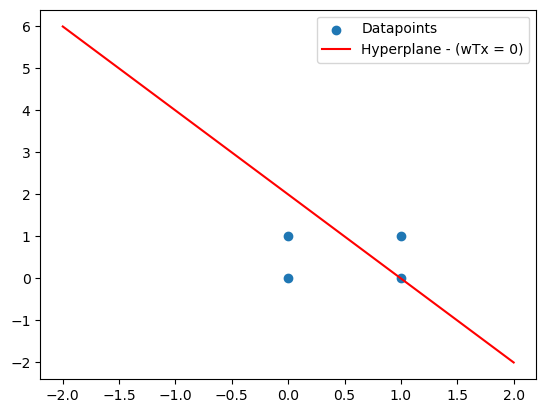

[-2  2  1]


In [245]:
p4 = Perceptron(and_df)
p4.build_model(plot=True)